In [1]:
from collections import defaultdict
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
# import torch

from utils.data import pickle_load, DimUniversalMinMaxScaler, DimUniversalStandardScaler, get_exchange_rate_dataset, get_ett_dataset, get_etl_dataset
from utils.metrics import MAE_numpy as MAE, MSE_numpy as MSE, MAPE_numpy as MAPE
# from utils.timediffusion import train_forecast


results_dir, data_dir = Path("results"), Path("data")
epochs, steps_per_epoch = 4, 16
horizons = [96, 192, 336, 720]
# get_lags = lambda h: h * 5 if h < 500 else h * 2
train_part = 0.7
test_size = 0.2
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# print(device)

In [2]:
results = []
for horizon in horizons:
    results.append([])
    for ts_id in range(8):
        results[- 1].append(pickle_load(results_dir / f"Exchange/ts{ts_id}_horizon{horizon}.pkl"))

mm_scalers = []
s_scalers = []
for ts_id, ts in enumerate(get_exchange_rate_dataset(data_dir / "exchange_rate.txt")):
    ts = ts[:int(train_part * len(ts))]
    mm_scalers.append(DimUniversalMinMaxScaler())
    s_scalers.append(DimUniversalStandardScaler())
    mm_scalers[- 1].fit(ts)
    s_scalers[- 1].fit(ts)

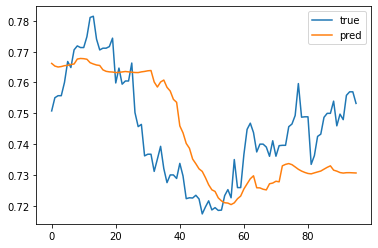

mae=0.01280975994197528, mse=0.00022640275439279517
mae_snorm=0.12422944035948763, mse_snorm=0.02129357660180851
mae_mmnorm=0.025896451144318666, mse_mmnorm=0.0009252953252606197


In [3]:
horizon_id = 0
ts_id = 0
sample_id = 0

y_true = results[horizon_id][ts_id]['y'][sample_id]
preds = results[horizon_id][ts_id]['preds'][sample_id]

plt.plot(y_true)
plt.plot(preds)
plt.legend(["true", "pred"])
plt.show()

mae = MAE(preds, y_true)
mse = MSE(preds, y_true)
print(f"{mae=}, {mse=}")

preds_snorm, y_true_snorm = map(s_scalers[ts_id].transform, (preds, y_true))
mae_snorm = MAE(preds_snorm, y_true_snorm)
mse_snorm = MSE(preds_snorm, y_true_snorm)
print(f"{mae_snorm=}, {mse_snorm=}")

preds_mmnorm, y_true_mmnorm = map(mm_scalers[ts_id].transform, (preds, y_true))
mae_mmnorm = MAE(preds_mmnorm, y_true_mmnorm)
mse_mmnorm = MSE(preds_mmnorm, y_true_mmnorm)
print(f"{mae_mmnorm=}, {mse_mmnorm=}")

In [4]:
preprocess_funcs_names = ["Pure", "StandardScaler", "MinMaxScaler"]
metrics = [MAE, MSE, MAPE]

for horizon_id, horizon in enumerate(horizons):
    ds_metrics = defaultdict(list)
    for ts_id in range(8):
        preprocess_funcs = [lambda x: x, s_scalers[ts_id].transform, mm_scalers[ts_id].transform]
        for pfunc, pfunc_name in zip(preprocess_funcs, preprocess_funcs_names):
            for mid, metric in enumerate(metrics):
                ds_metrics[f"{metric.__name__}_{pfunc_name}"].append(
                    metric(pfunc(results[horizon_id][ts_id]["preds"]), pfunc(results[horizon_id][ts_id]["y"]))
                    )
    ds_metrics = {key: np.mean(value) for key, value in ds_metrics.items()}
    print(f"{horizon=}")
    for pfunc_name in preprocess_funcs_names:
        print(f"\tMAE_{pfunc_name}={ds_metrics[f'MAE_numpy_{pfunc_name}']:0.3f} MSE_{pfunc_name}={ds_metrics[f'MSE_numpy_{pfunc_name}']:0.3f}")
    print(f"\tMAPE={ds_metrics['MAPE_numpy_Pure']}")

horizon=96
	MAE_Pure=0.020 MSE_Pure=0.002
	MAE_StandardScaler=0.221 MSE_StandardScaler=0.112
	MAE_MinMaxScaler=0.049 MSE_MinMaxScaler=0.005
	MAPE=0.026509372126405677
horizon=192
	MAE_Pure=0.039 MSE_Pure=0.004
	MAE_StandardScaler=0.432 MSE_StandardScaler=0.323
	MAE_MinMaxScaler=0.096 MSE_MinMaxScaler=0.015
	MAPE=0.05333698437330194
horizon=336
	MAE_Pure=0.052 MSE_Pure=0.006
	MAE_StandardScaler=0.585 MSE_StandardScaler=0.572
	MAE_MinMaxScaler=0.129 MSE_MinMaxScaler=0.027
	MAPE=0.07157937335578651
horizon=720
	MAE_Pure=0.062 MSE_Pure=0.008
	MAE_StandardScaler=0.798 MSE_StandardScaler=1.115
	MAE_MinMaxScaler=0.172 MSE_MinMaxScaler=0.049
	MAPE=0.09333630096407752


ETL

In [21]:
results = []
for horizon in horizons:
    results.append([])
    for ts_id in range(8):
        results[- 1].append(pickle_load(results_dir / f"ETL/ts{ts_id}_horizon{horizon}.pkl"))

mm_scalers = []
s_scalers = []
for ts_id, ts in enumerate(get_etl_dataset(data_dir / "LD2011_2014.txt")):
    ts = ts[:int(train_part * len(ts))]
    mm_scalers.append(DimUniversalMinMaxScaler())
    s_scalers.append(DimUniversalStandardScaler())
    mm_scalers[- 1].fit(ts)
    s_scalers[- 1].fit(ts)
    if ts_id == 7:
        break

c:\Users\Владислав\Учеба\Магистратура\time-series\project\utils\data.py:80: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, sep=";", usecols=[f"MT_{i:0>3}" for i in range(1, 371

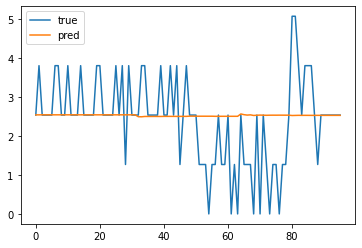

mae=0.758895189301214, mse=1.25145309578283
mae_snorm=0.11576221334701887, mse_snorm=0.029119548536697844
mae_mmnorm=0.01573708979412915, mse_mmnorm=0.0005381456398982162


In [22]:
horizon_id = 0
ts_id = 0
sample_id = 0

y_true = results[horizon_id][ts_id]['y'][sample_id]
preds = results[horizon_id][ts_id]['preds'][sample_id]

plt.plot(y_true)
plt.plot(preds)
plt.legend(["true", "pred"])
plt.show()

mae = MAE(preds, y_true)
mse = MSE(preds, y_true)
print(f"{mae=}, {mse=}")

preds_snorm, y_true_snorm = map(s_scalers[ts_id].transform, (preds, y_true))
mae_snorm = MAE(preds_snorm, y_true_snorm)
mse_snorm = MSE(preds_snorm, y_true_snorm)
print(f"{mae_snorm=}, {mse_snorm=}")

preds_mmnorm, y_true_mmnorm = map(mm_scalers[ts_id].transform, (preds, y_true))
mae_mmnorm = MAE(preds_mmnorm, y_true_mmnorm)
mse_mmnorm = MSE(preds_mmnorm, y_true_mmnorm)
print(f"{mae_mmnorm=}, {mse_mmnorm=}")

In [23]:
preprocess_funcs_names = ["Pure", "StandardScaler", "MinMaxScaler"]
metrics = [MAE, MSE, MAPE]

for horizon_id, horizon in enumerate(horizons):
    ds_metrics = defaultdict(list)
    for ts_id in range(8):
        preprocess_funcs = [lambda x: x, s_scalers[ts_id].transform, mm_scalers[ts_id].transform]
        for pfunc, pfunc_name in zip(preprocess_funcs, preprocess_funcs_names):
            for mid, metric in enumerate(metrics):
                ds_metrics[f"{metric.__name__}_{pfunc_name}"].append(
                    metric(pfunc(results[horizon_id][ts_id]["preds"]), pfunc(results[horizon_id][ts_id]["y"]))
                    )
    ds_metrics = {key: np.mean(value) for key, value in ds_metrics.items()}
    print(f"{horizon=}")
    for pfunc_name in preprocess_funcs_names:
        print(f"\tMAE_{pfunc_name}={ds_metrics[f'MAE_numpy_{pfunc_name}']:0.3f} MSE_{pfunc_name}={ds_metrics[f'MSE_numpy_{pfunc_name}']:0.3f}")
    print(f"\tMAPE={ds_metrics['MAPE_numpy_Pure']}")

horizon=96
	MAE_Pure=19.669 MSE_Pure=1500.031
	MAE_StandardScaler=0.493 MSE_StandardScaler=0.621
	MAE_MinMaxScaler=0.057 MSE_MinMaxScaler=0.009
	MAPE=11497629.986651916
horizon=192
	MAE_Pure=22.791 MSE_Pure=2200.321
	MAE_StandardScaler=0.548 MSE_StandardScaler=0.876
	MAE_MinMaxScaler=0.064 MSE_MinMaxScaler=0.012
	MAPE=24411293.91400528
horizon=336
	MAE_Pure=26.532 MSE_Pure=2722.792
	MAE_StandardScaler=0.621 MSE_StandardScaler=0.997
	MAE_MinMaxScaler=0.071 MSE_MinMaxScaler=0.013
	MAPE=45756509.956619814
horizon=720
	MAE_Pure=20.458 MSE_Pure=1719.505
	MAE_StandardScaler=0.534 MSE_StandardScaler=0.738
	MAE_MinMaxScaler=0.060 MSE_MinMaxScaler=0.010
	MAPE=43817625.00024779


ETT

In [24]:
results = []
for horizon in horizons:
    results.append([])
    for ts_id in range(7):
        results[- 1].append(pickle_load(results_dir / f"ETT/ts{ts_id}_horizon{horizon}.pkl"))

mm_scalers = []
s_scalers = []
for ts_id, ts in enumerate(get_ett_dataset(data_dir / "ETDataset")):
    ts = ts[:int(train_part * len(ts))]
    mm_scalers.append(DimUniversalMinMaxScaler())
    s_scalers.append(DimUniversalStandardScaler())
    mm_scalers[- 1].fit(ts)
    s_scalers[- 1].fit(ts)

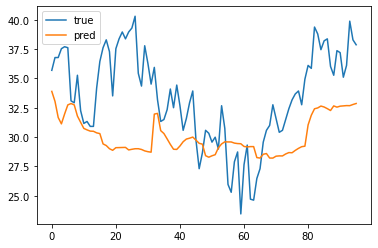

mae=3.992888947327932, mse=23.28355376137851
mae_snorm=0.4001157729187213, mse_snorm=0.2338008928104264
mae_mmnorm=0.037007860576220235, mse_mmnorm=0.0020001509133874833


In [25]:
horizon_id = 0
ts_id = 0
sample_id = 0

y_true = results[horizon_id][ts_id]['y'][sample_id]
preds = results[horizon_id][ts_id]['preds'][sample_id]

plt.plot(y_true)
plt.plot(preds)
plt.legend(["true", "pred"])
plt.show()

mae = MAE(preds, y_true)
mse = MSE(preds, y_true)
print(f"{mae=}, {mse=}")

preds_snorm, y_true_snorm = map(s_scalers[ts_id].transform, (preds, y_true))
mae_snorm = MAE(preds_snorm, y_true_snorm)
mse_snorm = MSE(preds_snorm, y_true_snorm)
print(f"{mae_snorm=}, {mse_snorm=}")

preds_mmnorm, y_true_mmnorm = map(mm_scalers[ts_id].transform, (preds, y_true))
mae_mmnorm = MAE(preds_mmnorm, y_true_mmnorm)
mse_mmnorm = MSE(preds_mmnorm, y_true_mmnorm)
print(f"{mae_mmnorm=}, {mse_mmnorm=}")

In [26]:
preprocess_funcs_names = ["Pure", "StandardScaler", "MinMaxScaler"]
metrics = [MAE, MSE, MAPE]

for horizon_id, horizon in enumerate(horizons):
    ds_metrics = defaultdict(list)
    for ts_id in range(7):
        preprocess_funcs = [lambda x: x, s_scalers[ts_id].transform, mm_scalers[ts_id].transform]
        for pfunc, pfunc_name in zip(preprocess_funcs, preprocess_funcs_names):
            for mid, metric in enumerate(metrics):
                ds_metrics[f"{metric.__name__}_{pfunc_name}"].append(
                    metric(pfunc(results[horizon_id][ts_id]["preds"]), pfunc(results[horizon_id][ts_id]["y"]))
                    )
    ds_metrics = {key: np.mean(value) for key, value in ds_metrics.items()}
    print(f"{horizon=}")
    for pfunc_name in preprocess_funcs_names:
        print(f"\tMAE_{pfunc_name}={ds_metrics[f'MAE_numpy_{pfunc_name}']:0.3f} MSE_{pfunc_name}={ds_metrics[f'MSE_numpy_{pfunc_name}']:0.3f}")
    print(f"\tMAPE={ds_metrics['MAPE_numpy_Pure']}")

horizon=96
	MAE_Pure=3.000 MSE_Pure=20.873
	MAE_StandardScaler=0.329 MSE_StandardScaler=0.204
	MAE_MinMaxScaler=0.048 MSE_MinMaxScaler=0.005
	MAPE=37954601.10226212
horizon=192
	MAE_Pure=2.411 MSE_Pure=14.020
	MAE_StandardScaler=0.285 MSE_StandardScaler=0.161
	MAE_MinMaxScaler=0.040 MSE_MinMaxScaler=0.004
	MAPE=28898881.13665756
horizon=336
	MAE_Pure=2.346 MSE_Pure=12.216
	MAE_StandardScaler=0.276 MSE_StandardScaler=0.138
	MAE_MinMaxScaler=0.039 MSE_MinMaxScaler=0.003
	MAPE=15929737.41518633
horizon=720
	MAE_Pure=2.966 MSE_Pure=19.797
	MAE_StandardScaler=0.339 MSE_StandardScaler=0.216
	MAE_MinMaxScaler=0.047 MSE_MinMaxScaler=0.004
	MAPE=9001262.283496426
